(Most of the code in the notebook is filled, run the cells and observe the outputs. Fill the cells that contain only comments and no code using the comments as instruction. Submit the completed notebook on Gradescope.)

Below, we're generating sample data. Basically, it will create an array of samples of `size = 10`, centered around `loc=15`. We will get into what the scale parameter is later.




In [1]:
from scipy import stats
samples = stats.norm.rvs(loc=15,scale=5,size=10)
print(samples)

[17.83582974 14.57959987 15.41036069 15.14087204 12.19168604 12.65998708
 16.93207475  9.61655851 15.79625282 20.57998037]


Let's plot out what a histogram of these samples looks like

(array([1., 2., 4., 2., 1.]),
 array([ 9.61655851, 11.80924288, 14.00192725, 16.19461162, 18.387296  ,
        20.57998037]),
 <a list of 5 Patch objects>)

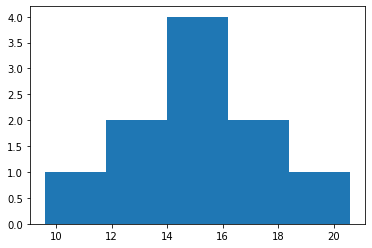

In [2]:
import matplotlib.pyplot as plt
plt.hist(samples, bins = 5)

Now let's look at what this kind of distribution, a normal or Gaussian distribution looks with many points

In [3]:
samples = stats.norm.rvs(loc=15,scale=5,size=1000)

(array([ 26., 277., 466., 212.,  19.]),
 array([-1.19842167,  5.48746733, 12.17335633, 18.85924533, 25.54513433,
        32.23102333]),
 <a list of 5 Patch objects>)

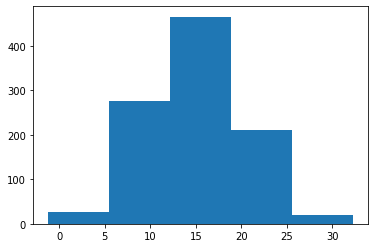

In [4]:
plt.hist(samples, bins = 5)

Since there are more data points we can get away with plotting more bins, which gives us more information about the curve

(array([  1.,   7.,   4.,  14.,  41.,  62.,  80.,  94., 126., 126., 111.,
        103.,  82.,  75.,  37.,  18.,  10.,   4.,   3.,   2.]),
 array([-1.19842167,  0.47305058,  2.14452283,  3.81599508,  5.48746733,
         7.15893958,  8.83041183, 10.50188408, 12.17335633, 13.84482858,
        15.51630083, 17.18777308, 18.85924533, 20.53071758, 22.20218983,
        23.87366208, 25.54513433, 27.21660658, 28.88807883, 30.55955108,
        32.23102333]),
 <a list of 20 Patch objects>)

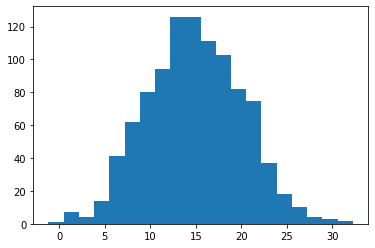

In [5]:
#TO FILL
#Recreate the same histogram but with 20 bins instead of 5 bins
#Here is the documentation for plt.hist : https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html
plt.hist(samples, bins = 20)


Below, we plot normal distributions with the same sigma, but different means. When we overplot two histograms, we need to change the alpha parameter which controls transparency of the histogram. 

(2.0, 6.0)

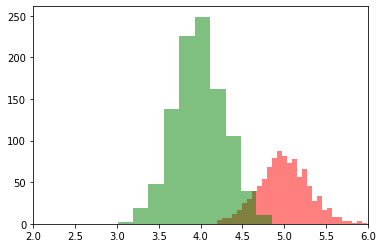

In [6]:
import numpy as np
import matplotlib.pyplot as plt
sigma_1 = 0.3
mu_1 = 5.0
a = 500

samples_1 = np.random.normal(mu_1, sigma_1, 1000)
plt.hist(samples_1, bins = 30, alpha = 0.5, color = 'red')
plt.xlim([0, 14])


sigma_2 = 0.3
mu_2 = 4.0
a = 500.

samples_2 = np.random.normal(mu_2, sigma_2, 1000)
plt.hist(samples_2, bins = 10, alpha = 0.5, color = 'green')
plt.xlim([2, 6])

The kind of samples that we have been creating is a Gaussian or normal distribution. A lot of data that is sampled with repeated trials will follow a Gaussian distribution, meaning that if we plot a histogram of the model as well as the following function 

$f(x) = A e^{-(x - \mu)^2  / \sigma^2}$

In [7]:
#Here we define our own function called gaussian_function
#The inputs to the function are x,a,sigma and mu and the output is y
#We will learn how to build our own functions in Unit 2
def gaussian_function(x, a, sigma, mu):
  y = a * np.exp(-(x - mu)**2. / (2. * sigma**2.))
  return y

We will see that the Gaussian function describes the shape of the histogram

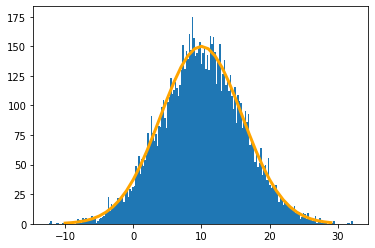

In [8]:
import numpy as np
sigma = 6.
mu = 10.
a = 150.

x_array = np.arange(40.) - 10
y_array = gaussian_function(x_array, a, sigma, mu)

samples = np.random.normal(mu, sigma, 10000)
plt.hist(samples, bins = 200)
plt.plot(x_array, y_array, color = 'orange', linewidth = 3.0)

The parameters of this Gaussian function are the mean and standard deviation. We can now see that the Gaussian function not only describes the shape, but the parameters of the Gaussian function relate to the means and standard deviations of our samples.

In [9]:
#TO FILL
#Print the mean of the variable samples - use np.mean
#Print the standard deviation of the variablre samples - use np.std
print(str(np.mean(samples)))
print(str(np.std(samples)))


10.041110955293334
6.02927149094637


A T-Test is a way to tell whether or not two distributions of samples give the same statistical result. We can take the means of two distributions but if we don't have many data points it is hard to tell whether or not they have the same results. First, if we have a distribution where the means are exactly the same, then the second value of a t-test function 

`stats.ttest_ind(samples_1,samples_2)`

Gives a p value of 0.78 (the second parameter)

For example, we can test our reaction time to a red and blue LED. If our reaction time is exactly the same, then it would give this p-value

Ttest_indResult(statistic=-1.7841706904885437, pvalue=0.07454764328769638)

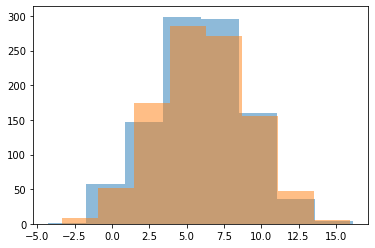

In [12]:
from scipy import stats
mean_1 = 6.0
mean_2 = 6.0
sigma = 3.0
num_points = 1000

samples_1 = stats.norm.rvs(loc=mean_1,scale=sigma,size=num_points)
samples_2 = stats.norm.rvs(loc=mean_2,scale=sigma,size=num_points)

plt.hist(samples_1, bins = 8, alpha = 0.5)
plt.hist(samples_2, bins = 8, alpha = 0.5)
stats.ttest_ind(samples_1,samples_2)

If we slightly change the mean, then the sample distributions are giving slightly different results. The p-value therefore decreases, and it may mean that the reaction times are different, but it is still not conclusive.

Ttest_indResult(statistic=-0.5031662273397256, pvalue=0.6149028695538838)

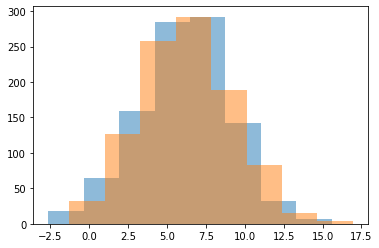

In [16]:
from scipy import stats
mean_1 = 6.0
mean_2 = 6.1

sigma = 3.0
num_points = 1000

samples_1 = stats.norm.rvs(loc=mean_1,scale=sigma,size=num_points)
samples_2 = stats.norm.rvs(loc=mean_2,scale=sigma,size=num_points)

plt.hist(samples_1, bins = 8, alpha = 0.5)
plt.hist(samples_2, bins = 8, alpha = 0.5)
stats.ttest_ind(samples_1,samples_2)

If we change the mean by a lot, then the p-value is much smaller and it is easy to see from the histogram that the two distributions are distinct. In our example, this would mean that the reaction times are definitely different. For the purposes of this lab, if we calculate the p-value and it is smaller than 0.05 then we can say that the two reaction times are statistically significant. 

Ttest_indResult(statistic=-22.13643004997817, pvalue=2.755078357999661e-97)

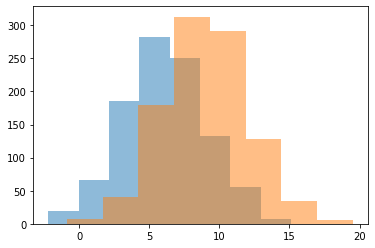

In [17]:
from scipy import stats
mean_1 = 6.0
mean_2 = 9.0
sigma = 3.0
num_points = 1000

samples_1 = stats.norm.rvs(loc=mean_1,scale=sigma,size=num_points)
samples_2 = stats.norm.rvs(loc=mean_2,scale=sigma,size=num_points)

plt.hist(samples_1, bins = 8, alpha = 0.5)
plt.hist(samples_2, bins = 8, alpha = 0.5)
stats.ttest_ind(samples_1,samples_2)